In [1]:
using Revise, Pkg
Pkg.activate("/home/louise/MSA/BpAlignGpu.jl")
using BpAlignGpu

  Activating project at `~/MSA/BpAlignGpu.jl`


In [2]:
using DelimitedFiles

In [3]:
data_seed = readdlm("../../../../Data/test/PF00397/PF00397_seed.fasta");
data_seed_SCE = readdlm("seed_SCE_PF00397.fasta");
#data_allseq = readdlm("sampling_allseq_PF00397.fasta");
data_allseq_initmaxP = readdlm("sampling_allseq_PF00397_initmaxP.fasta");
#data_allseq_initmaxP_75 = readdlm("sampling_allseq_PF00397_initmaxP_keep75.fasta");
#data_oneseq = readdlm("sampling_oneseq_PF00397.fasta");

In [4]:
L=31
q=21;

In [5]:
function statistics(dataMSA)
    f = zeros(L,q);
    C = zeros(L,L,q,q);
    M = Int64.(size(dataMSA, 1)/2)

    for l = 1:M
        s = string(dataMSA[2*l])
        for i=1:L
            ind = BpAlignGpu.letter2num(s[i], :amino)
            f[i,ind] += 1.0
            for j=1:L
                indj = BpAlignGpu.letter2num(s[j], :amino)
                C[i,j,ind, indj] += 1.0
            end
        end
    end    
    f .= f./M
    C .= C./M;
    
    for i=1:L
        for j=1:L
            for x=1:q
                for y=1:q
                    C[i,j,x,y] = C[i,j,x,y]-f[i,x]*f[j,y]
                end
            end
        end
    end
    return f, C
end

statistics (generic function with 1 method)

In [6]:
fseed, Cseed = statistics(data_seed);

In [7]:
fseed_SCE, Cseed_SCE = statistics(data_seed_SCE);

In [8]:
#fallseq, Callseq = statistics(data_allseq);

In [9]:
#foneseq, Coneseq = statistics(data_oneseq);

In [10]:
fallseq_imP, Callseq_imP = statistics(data_allseq_initmaxP);

In [11]:
#fallseq_imP75, Callseq_imP75 = statistics(data_allseq_initmaxP_75);

In [12]:
rfs = reshape(fseed, 1,L*q)[1,:]
rfsSCE = reshape(fseed_SCE, 1,L*q)[1,:]
rfaimP = reshape(fallseq_imP, 1,L*q)[1,:];

In [13]:
rCs = reshape(Cseed, 1,L*L*q*q)[1,:]
rCsSCE = reshape(Cseed_SCE, 1,L*L*q*q)[1,:]
#rCa = reshape(Callseq, 1,L*L*q*q)[1,:];
#rCo = reshape(Coneseq, 1,L*L*q*q)[1,:];
rCaimP = reshape(Callseq_imP, 1,L*L*q*q)[1,:];
#rCaimP75 = reshape(Callseq_imP75, 1,L*L*q*q)[1,:];

In [14]:
namefile = "store_Cij_ab.txt"
open(namefile, "a") do io
    writedlm(io, [rCs])
    writedlm(io, [rCaimP])
    writedlm(io, [rCsSCE])
end

In [15]:
namefile = "store_fij_ab.txt"
open(namefile, "a") do io
    writedlm(io, [rfs])
    writedlm(io, [rfaimP])
    writedlm(io, [rfsSCE])
end

In [14]:
using CairoMakie

In [20]:
f = Figure(font = "serif-roman", fontsize = 20,resolution = (1000, 500))
ax = Axis(f[1, 1], xlabel = L"$f_i(a)$ (seed)", ylabel = L"$f_i(a)$ (sampled)")
x = range(0, 1, length=100)
lines!(x,x, color="black")
scatter!(rfs, rfaimP, markersize = 5.0)
scatter!(rfs, rfsSCE, markersize = 7.0, marker=:x)#, color = (:red,0.5))

Scatter{Tuple{Vector{Point{2, Float32}}}}

In [21]:
ax = Axis(f[1, 2], xlabel = L"$C_{ij}(a,b)$ (seed)", ylabel = L"$C_{ij}(a,b)$ (sampled)")
y = range(-0.3, 0.3, length=100)
lines!(y,y, color="black")
scatter!(rCs, rCaimP, markersize = 5.0)
scatter!(rCs, rCsSCE, markersize = 7.0, marker=:x)#, color = (:red,0.5))

Scatter{Tuple{Vector{Point{2, Float32}}}}

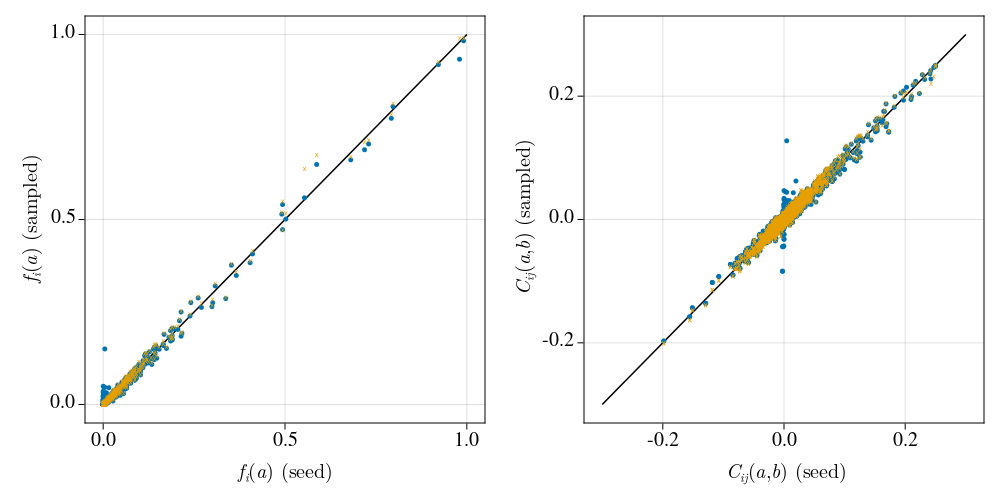

In [22]:
f

In [23]:
save("Vit-samp-freq-count.pdf", f, pt_per_unit = 0.5)

CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x000000000d1e2050, 500.0, 250.0, IOContext(IOStream(<file /home/louise/MSA/BpAlignGpu.jl/notebook/results/data_Viterbi_sampling/Vit-samp-freq-count.pdf>)))
